# Customer Segmentation

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

## Data Collection

In [ ]:
%pip install openpyxl




Note: you may need to restart the kernel to use updated packages.


In [78]:
df = pd.read_excel('C:/Users/kumar/OneDrive/Desktop/Machine Learning Project/datasets/Customer segmentation.xlsx')

In [79]:
df.shape

(541909, 8)

In [80]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [81]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Data Preprocessing

In [83]:
# Handling missing values if any
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [84]:
df = df.drop(columns=['CustomerID','Description','InvoiceNo','StockCode'])


In [86]:
df.shape

(541909, 4)

In [87]:
df.isnull().sum()

Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [88]:
# Handling Categorical Columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['Country']


In [ ]:
df['Country'].nunique()

38

In [96]:
# Only encode if 'Country' exists (avoids KeyError if already encoded or missing)
if 'Country' in df.columns:
	df = pd.get_dummies(df, columns=['Country'], drop_first=True)
else:
	# 'Country' already expanded into dummy columns or not present — no action needed
	pass

In [98]:
# Drop datetime column before scaling
df_scaled = df.drop(columns=['InvoiceDate'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_scaled)


## Training Model

In [99]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


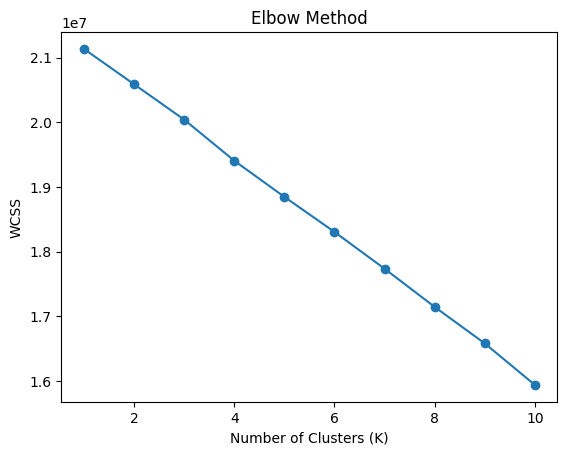

In [100]:
plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


Using device: cuda
K=2, Silhouette Score=0.687
K=3, Silhouette Score=0.849
K=4, Silhouette Score=0.671


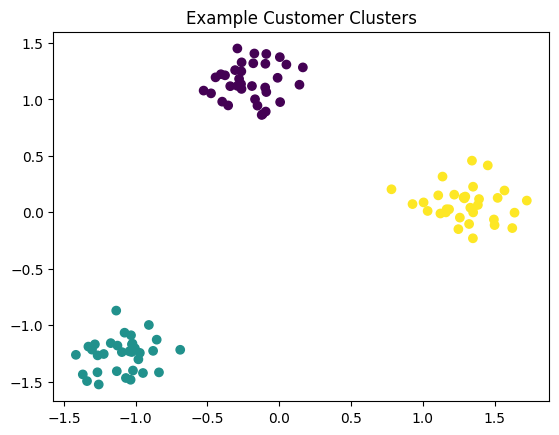

In [ ]:
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
# 1️⃣ Enable GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# 2️⃣ Create synthetic dataset (like customers)
# 100 samples, 2 features, 3 centers
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, random_state=42)

# 3️⃣ Move data to GPU using PyTorch
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)

# 4️⃣ Scale data (still on CPU for simplicity)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_tensor.cpu().numpy())  # KMeans needs numpy array

# 5️⃣ Train K-Means and compute silhouette
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")

# 6️⃣ Visualize clusters
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='viridis')
plt.title("Example Customer Clusters")
plt.show()
